# Projet Spotify - R


## Importation des données

In [129]:
# Lecture des données
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
spotify <- read.table(paste(path, "spotify-extr.txt", sep = ""),
                    sep = " ", header = TRUE)
# Vérification du contenu
summary(spotify)

    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
    duration           energy       instrumentalness       key           
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   Length:10000      
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   Class :character  
 Median : 206530   Median :0.4760   Median :0.000174   Mode  :character  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947                     
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100                     
 Max.   :2703227   Max.   :1.0000   Max.   :1.000000                     
    liveness 

In [130]:
head(spotify)
spotify[, "key"] <- as.factor(spotify[, "key"])
spotify[, "pop.class"] <- as.factor(spotify[, "pop.class"])
spotify[, "mode"] <- as.factor(spotify[, "mode"])

summary (spotify)




,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
161704,0.647,1975,0.4490,0.376,298840,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,97.831,C
38184,0.489,2018,0.3710,0.856,324189,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,122.080,A


    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
                                                                  
    duration           energy       instrumentalness        key      
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   C      :1282  
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   G      :1188  
 Median : 206530   Median :0.4760   Median :0.000174   D      :1092  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947   A      :1050  
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100   F      : 961  
 Max.   :2703227   Max.   :1.0000   Max.   :

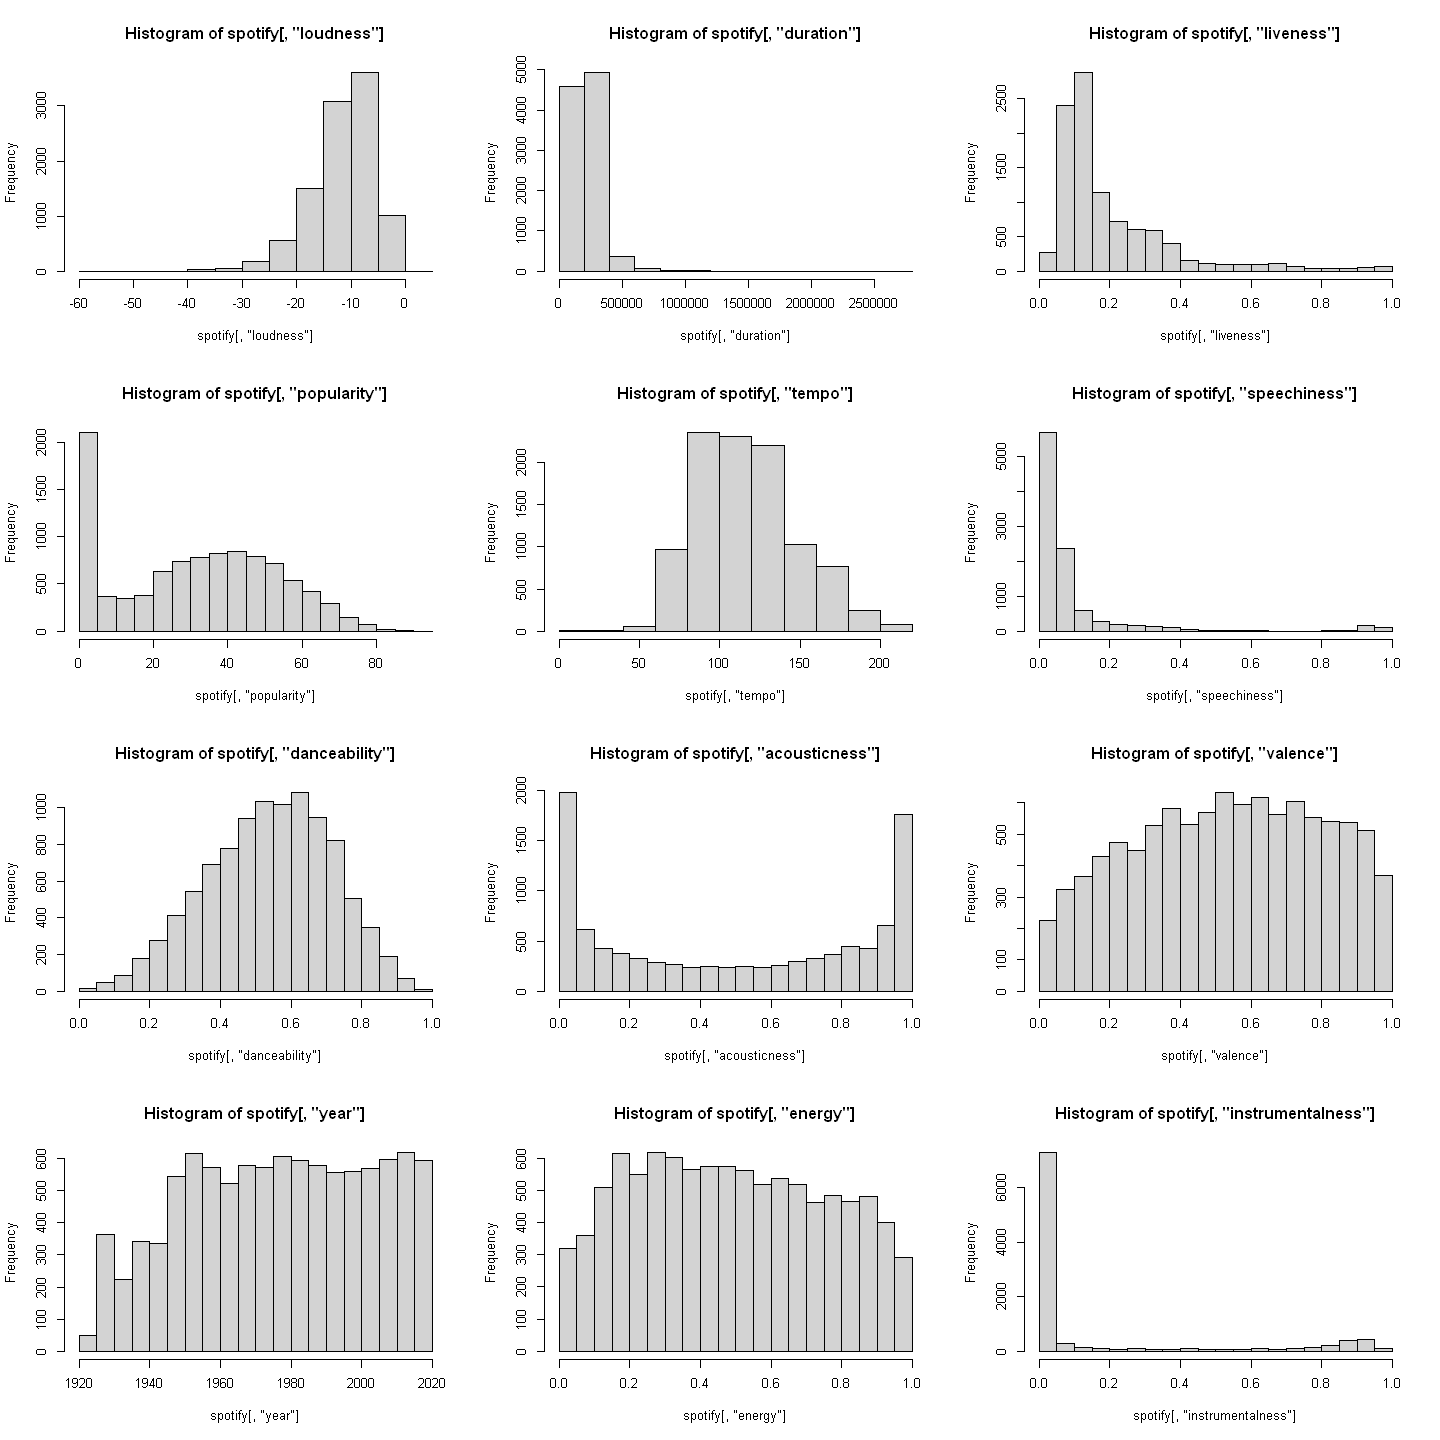

In [131]:
par(mfrow = c(4, 3))
options(repr.plot.width = 12, repr.plot.height = 12)
hist(spotify[, "loudness"])
hist(spotify[, "duration"])
hist(spotify[, "liveness"])
hist(spotify[, "popularity"])
hist(spotify[, "tempo"])
hist(spotify[, "speechiness"])
hist(spotify[, "danceability"])
hist(spotify[, "acousticness"])
hist(spotify[, "valence"])
hist(spotify[, "year"])
hist(spotify[, "energy"])
hist(spotify[, "instrumentalness"])



In [132]:
# 2 versions (avec sans transfo)

# spotify [, "liveness_n"] <- (log (1+spotify[, "liveness"]))
# hist(spotify[, "liveness_n"])

# spotify [, "speechiness_n"] <- (log (1+spotify[, "speechiness"]))
# hist(spotify[, "spechiness_n"])

# # summary(spotify)

Pour avoir le plus de symétrie possible (et donc se rapprocher de distributions plus gaussienes), on essaie quelques transformations sur certaines variables. Par exemple on prend le log de
liveness plutôt que liveness. On fait cela uniquement pour car on commence utiliser les modèles linéaires. 

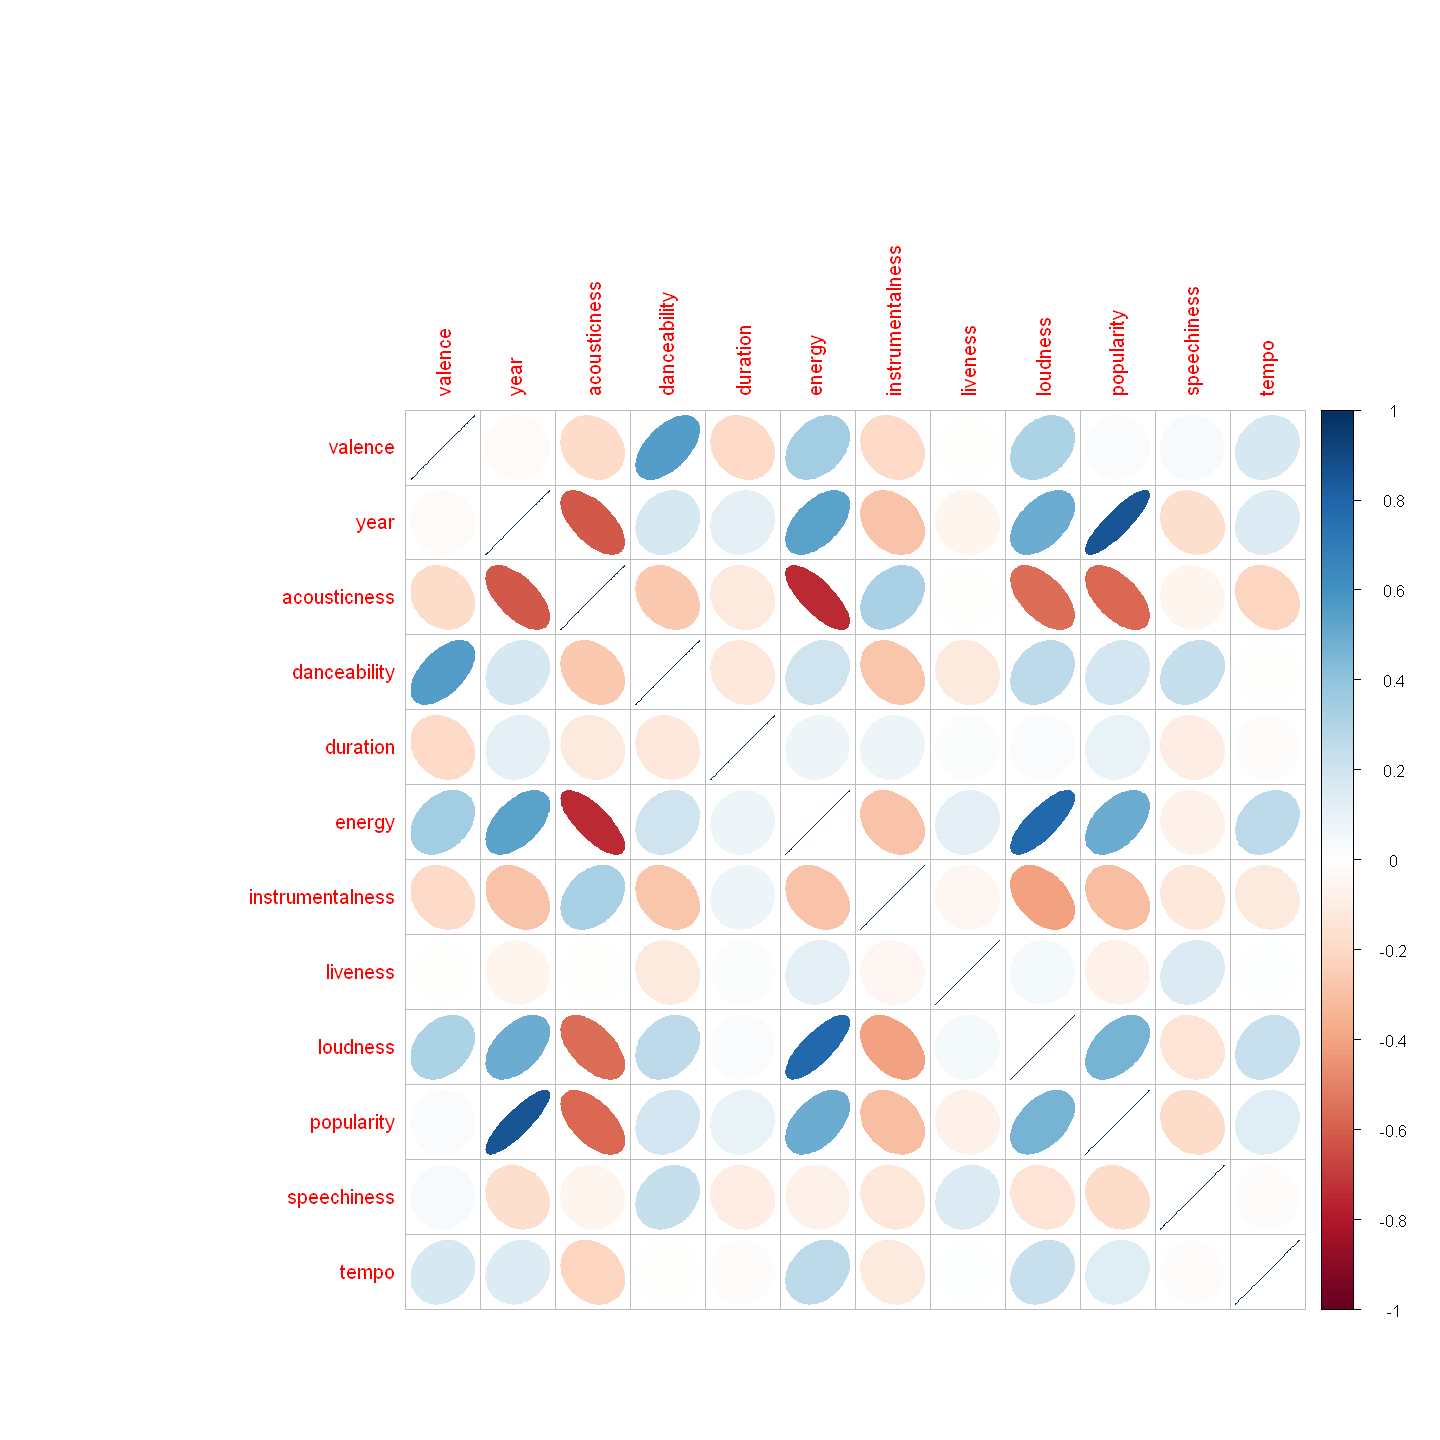

In [133]:
# options(repr.plot.width = 8, repr.plot.height = 8)
# pairs(spotify[, c(1:7, 9:10, 12:14)])

#le graphique par pairs de variables n'étant pas très ewxploitable on choisit de ne pas s'en servir.
#library (corrplot)
corrplot(cor(spotify[, c(1:7, 9:10, 12:14)]), method="ellipse")

On affiche le graphe de corrélation entre nos variables quantitatives et on constate que la popularité est bien corrélée (positivement) avec l'année de même que l'énergie avec l'intensité (loudness).  A contrario on a une corrélation fortement négative entre l'énergie et (acousticness).

Notre variable réponse (pop.class) sera donc bien liée à l'année

### ACP 

In [134]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)
#spotify_acp= spotify [,-12] # C'est les données auxquelles on retire la variable popularité pour ne pas biaisée l'ACP.
acp.spotify <- PCA(spotify, scale.unit = TRUE,
            graph = FALSE, quali.sup = c(8,11,15) , quanti.sup = 12, ncp = 12)




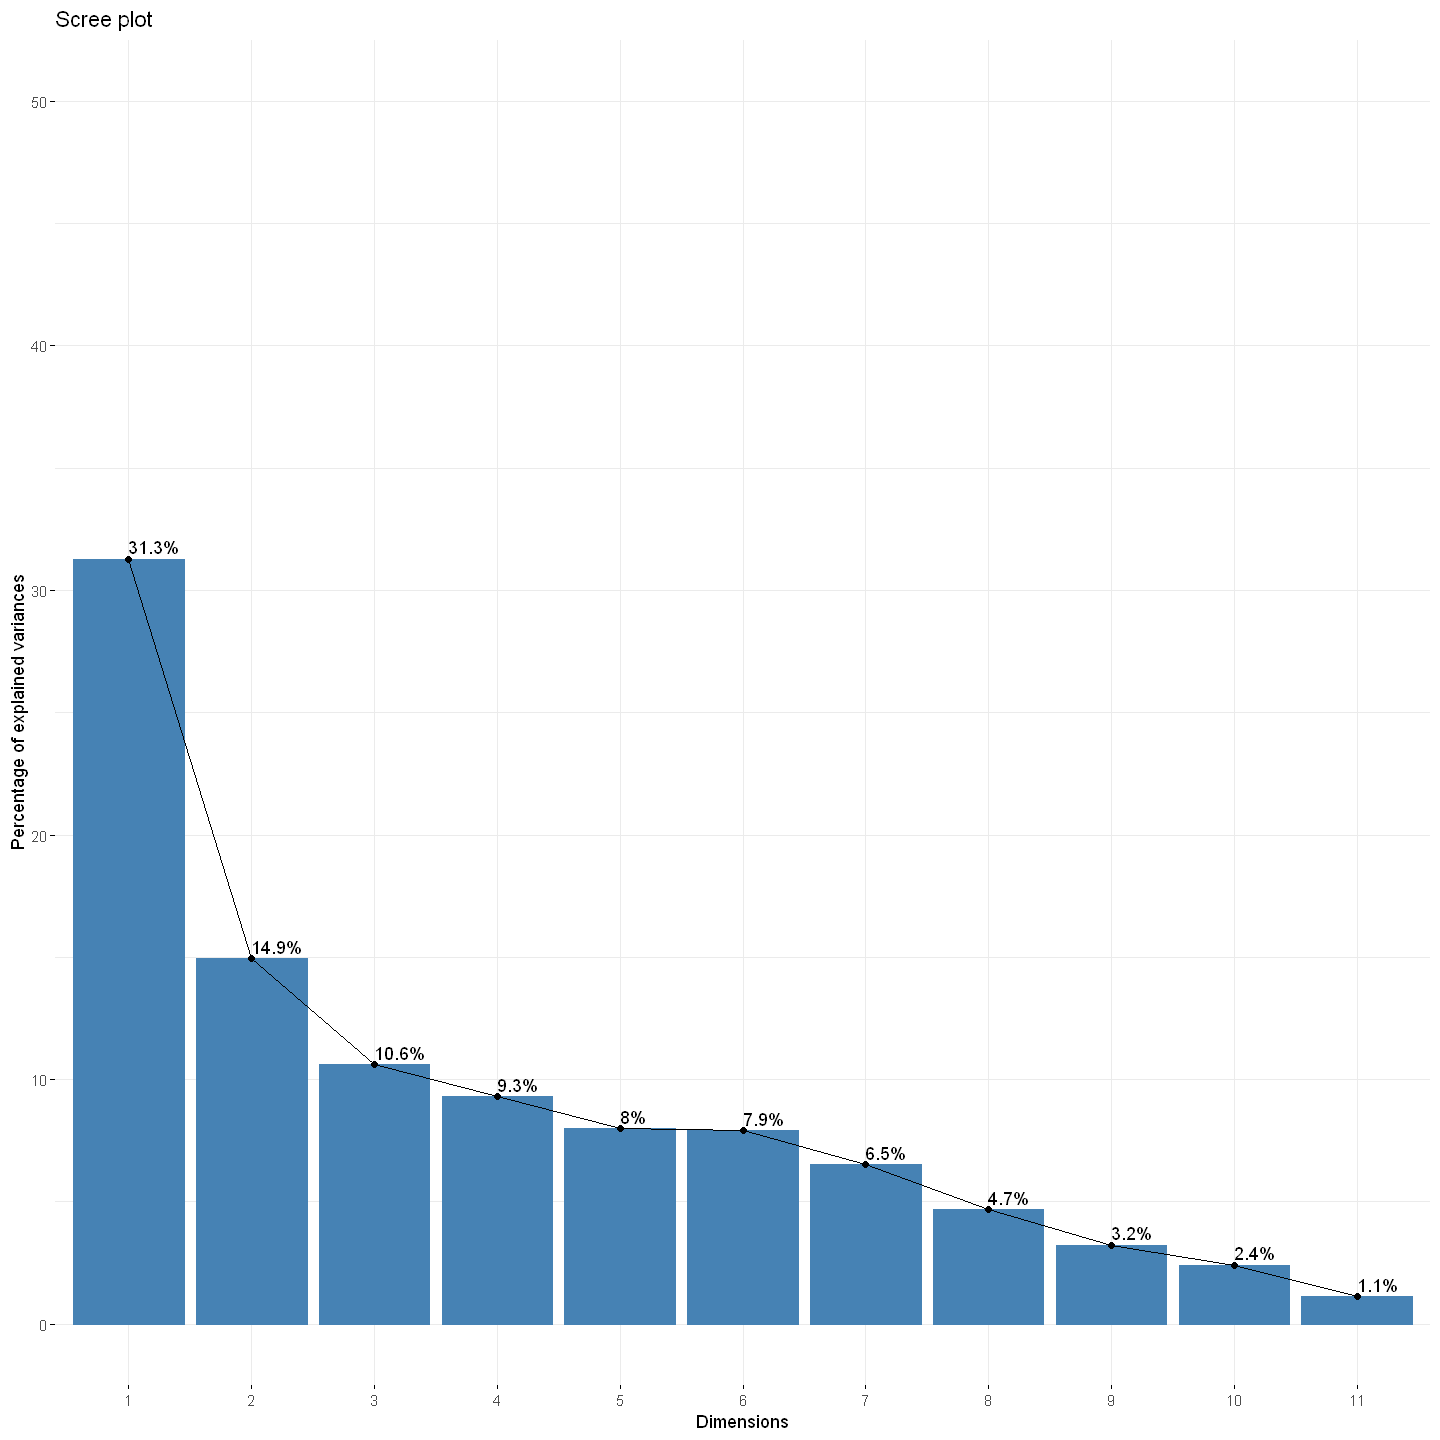

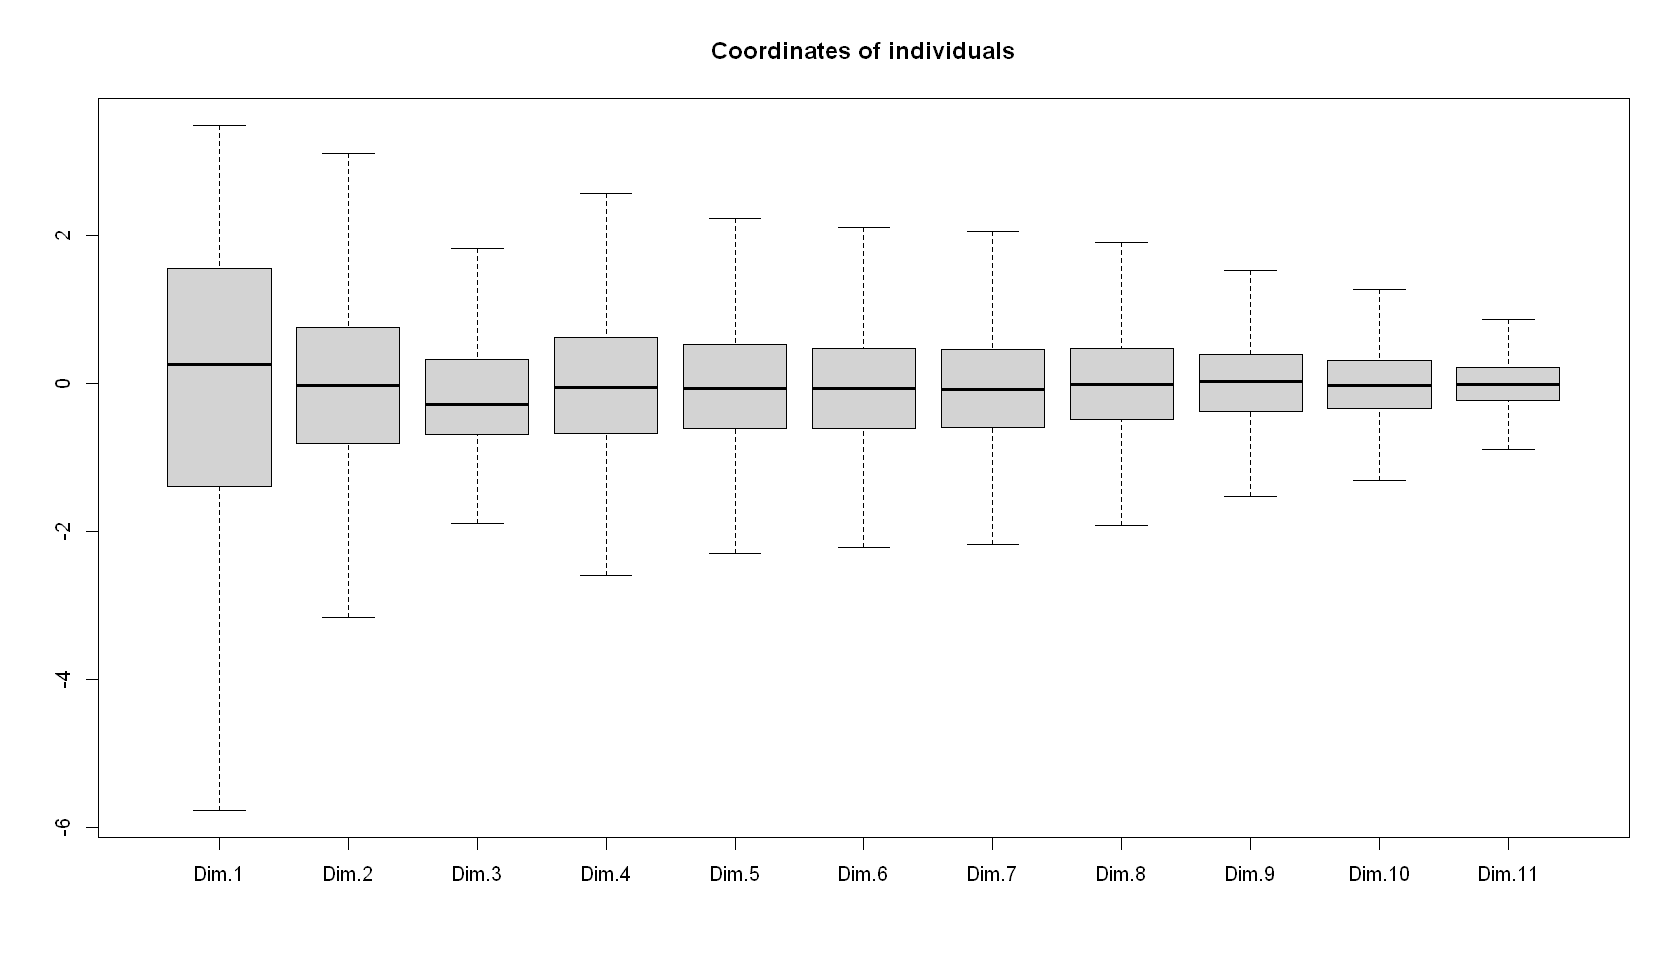

In [135]:
library(factoextra)

fviz_eig(acp.spotify,ncp=12,addlabels=TRUE, ylim=c(0,50))
options(repr.plot.width = 14, repr.plot.height = 8)

boxplot(acp.spotify$ind$coord, main = "Coordinates of individuals", outline=FALSE)

Avec l'éboulis de l'inertie on chosisit de garder 6 dimensions qui concentre plus de 80% de l'inertie totale, cela correspond bien à l'endroit ou il y'a une cassure sur le graphe
Sur le graphe des boxplots on confirme notre idée de conserver 6 dimensions car la variance devient très faible.   

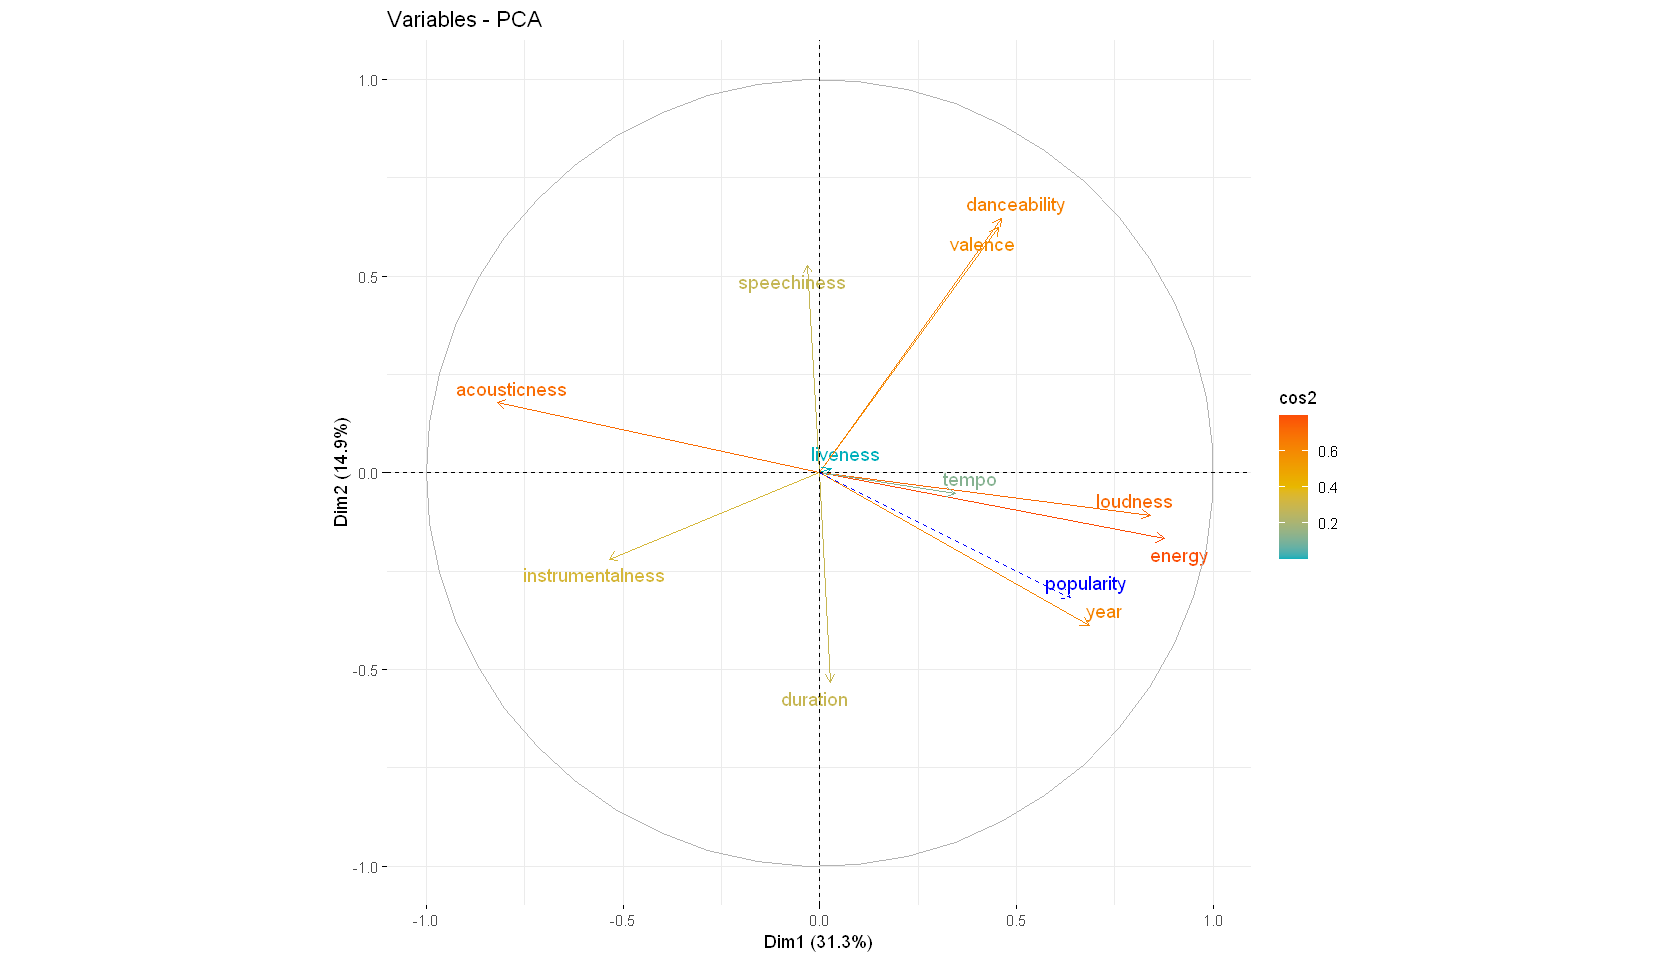

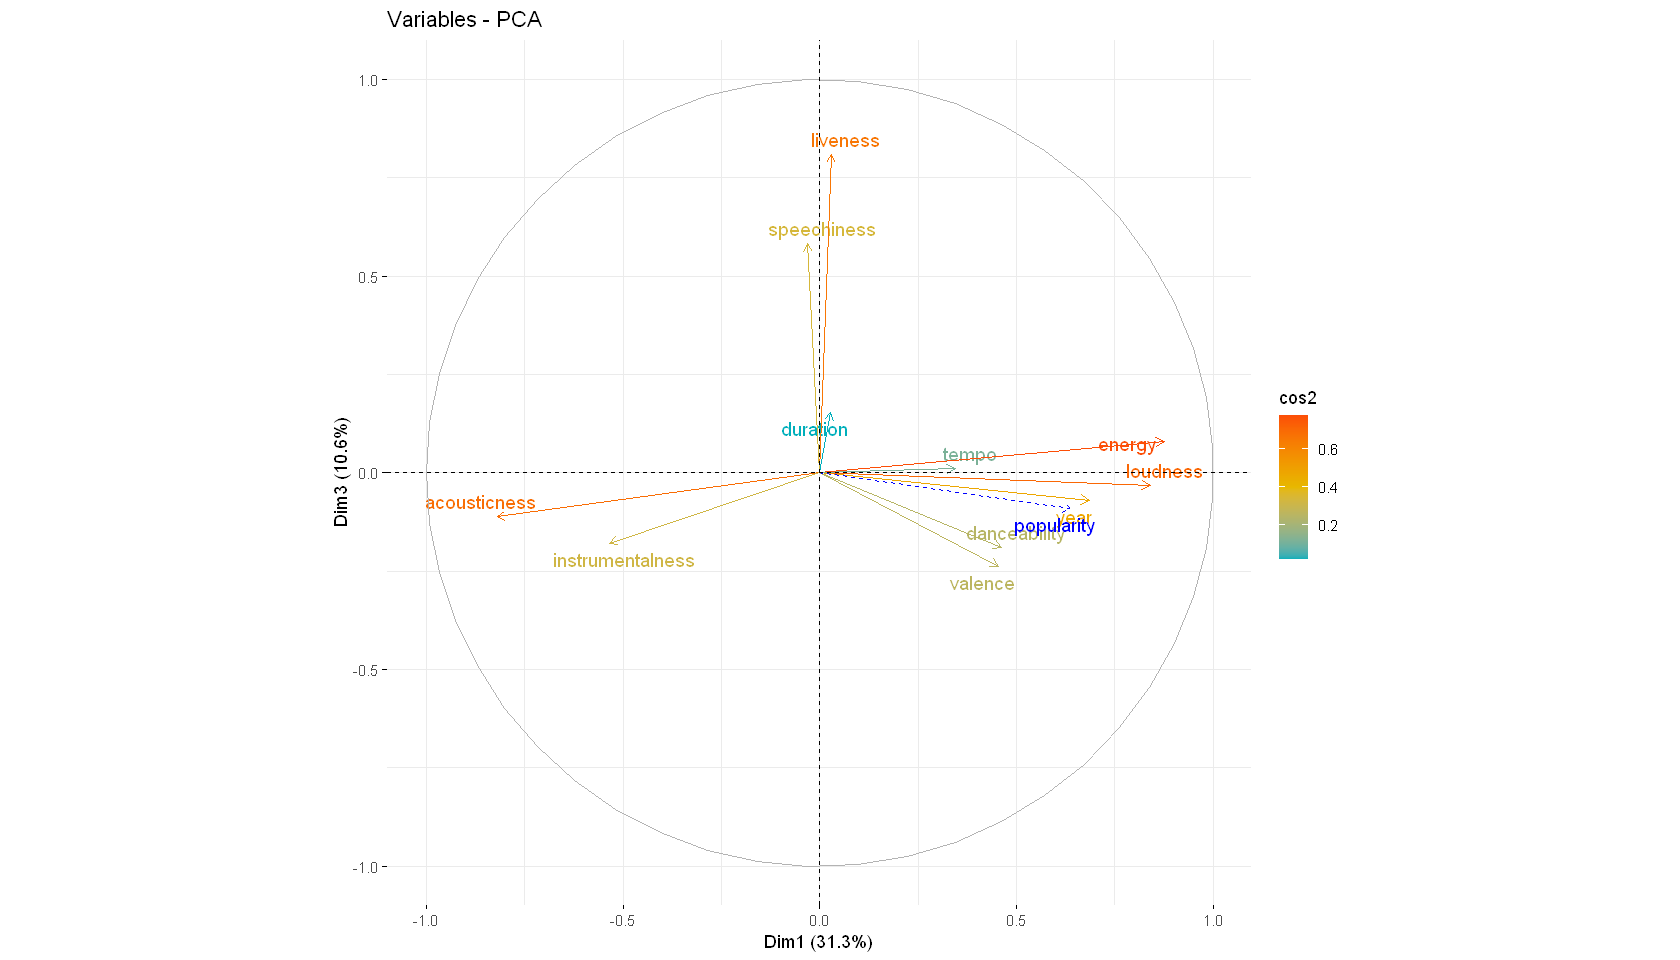

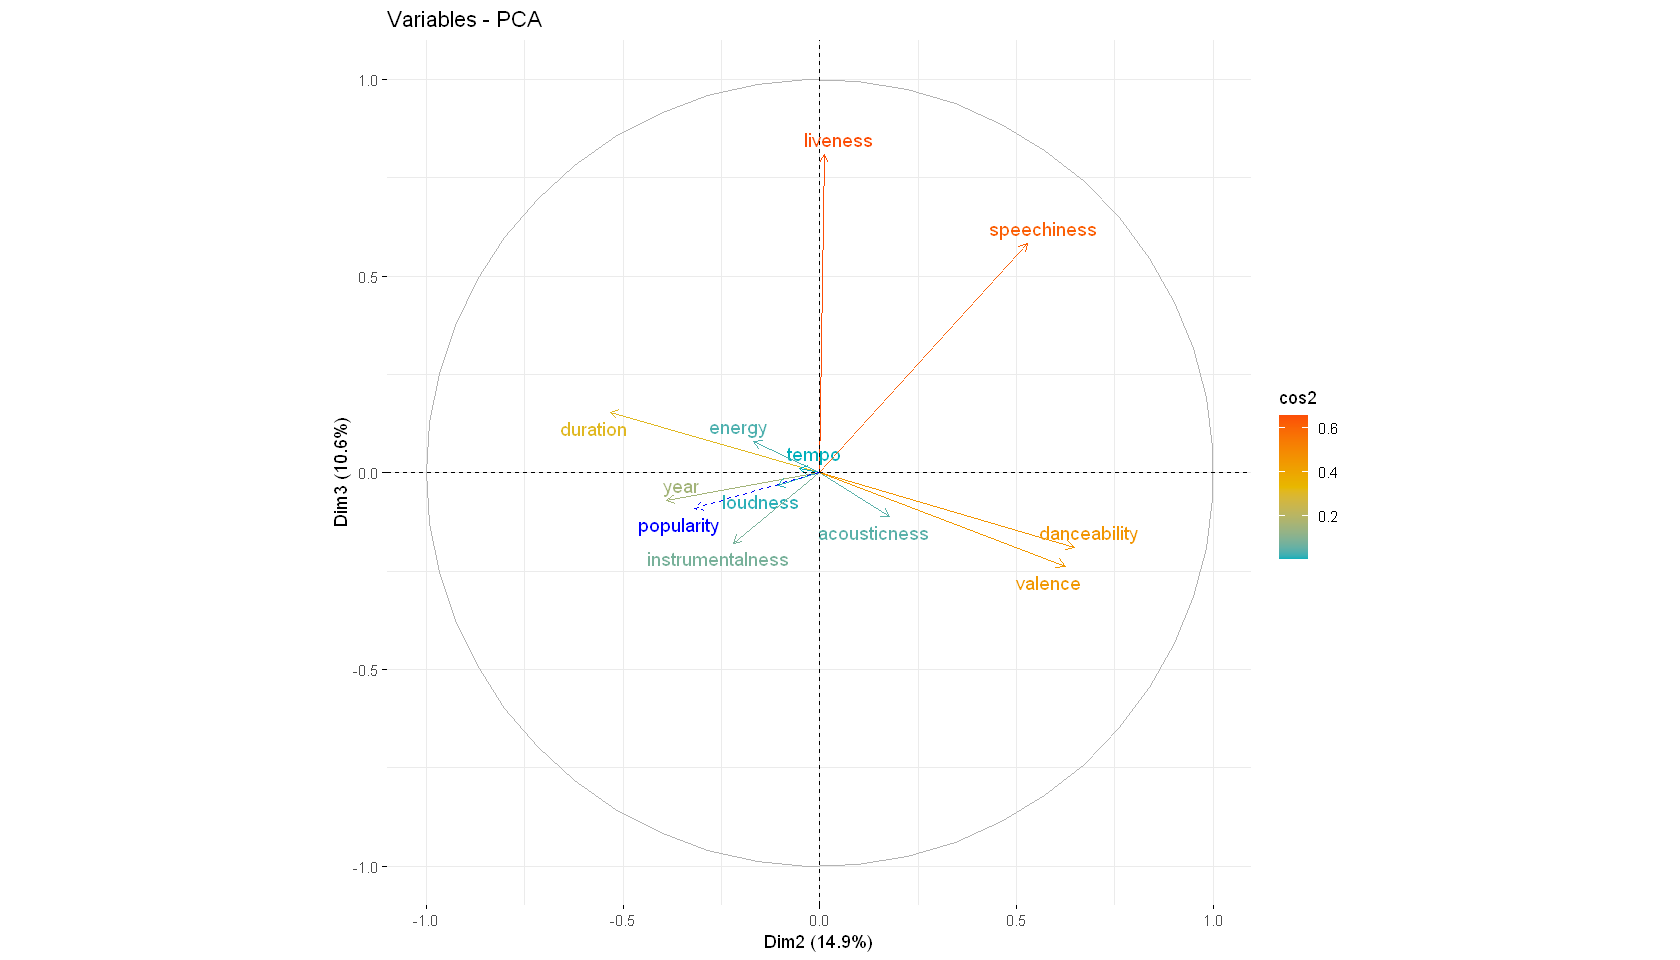

In [136]:
#plot(acp.spotify,axes=c(1, 2), choix = "ind", select = "contrib 5", unselect = 0)

fviz_pca_var(acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

fviz_pca_var(axes= c(1,3),acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

fviz_pca_var(axes= c(2,3),acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )
#acp.spotify

Warning message:
"ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


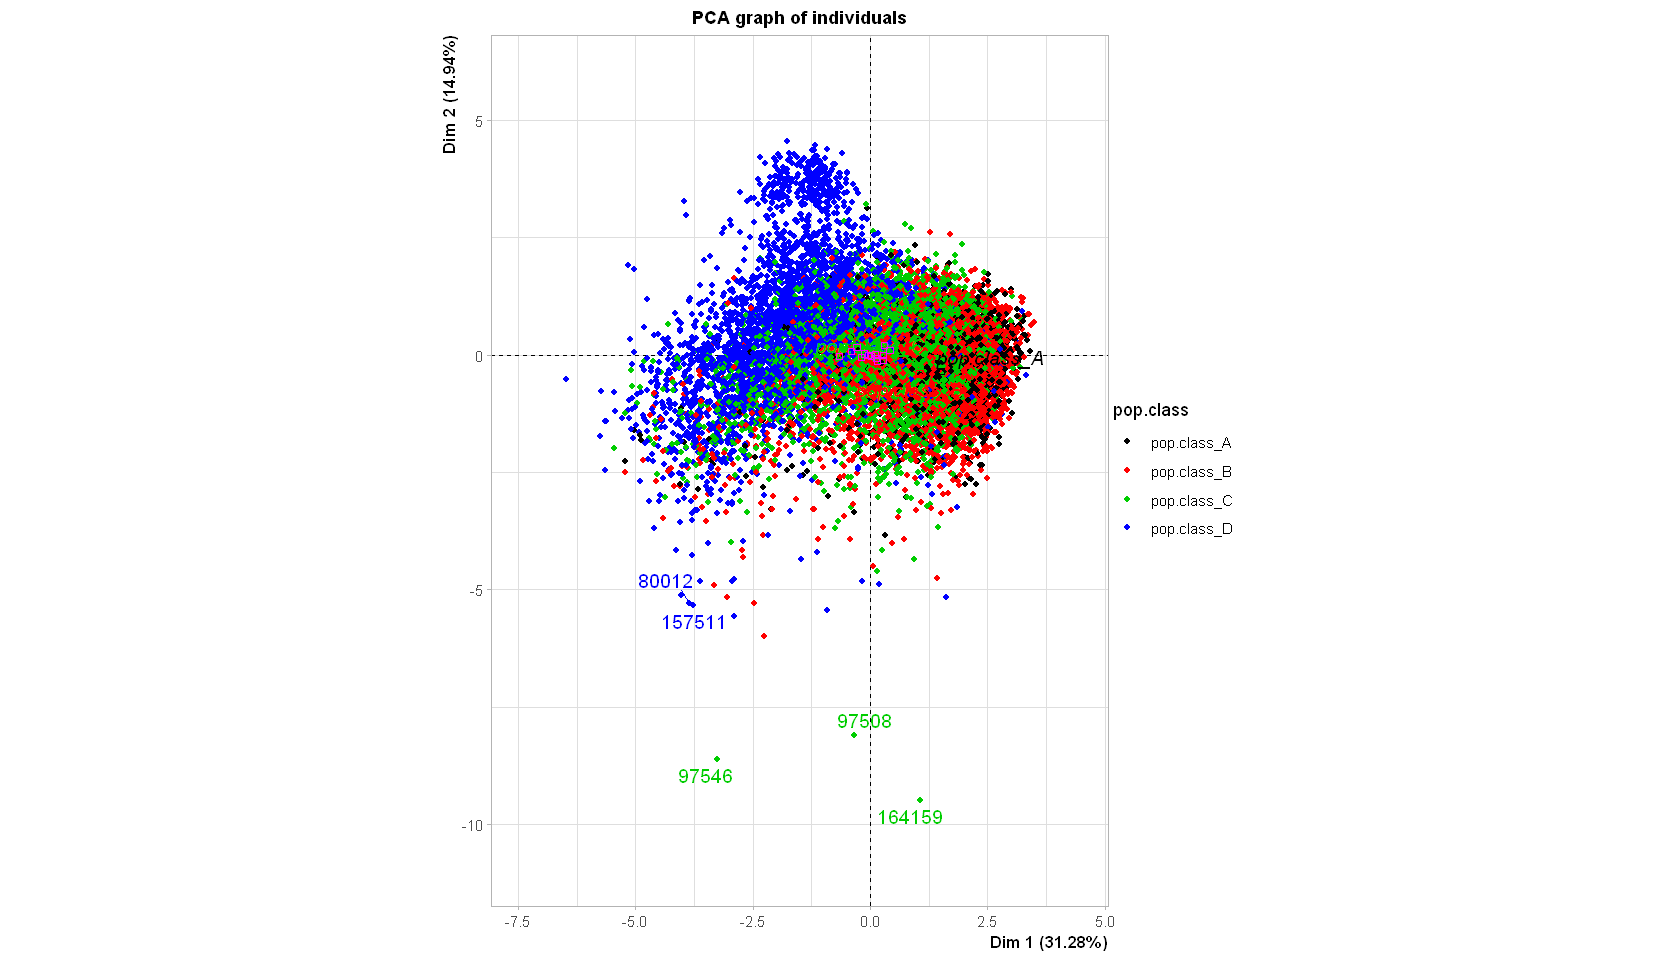

In [137]:
plot(acp.spotify, choix = "ind", habillage = 15,
     select = "contrib 5", unselect = 0)

On voit que les clusters ne sont pas assez distinguables, on a la classe D  (en bleu) qui est 

In [138]:
#summary(spotify)
km.spotify <- kmeans (spotify [,c(-8,-15,-11,-12)], centers=4)
cbind(coul= as.factor(km.spotify$cluster),spotify [,c(-8,-11,-12)])
acp2 <- PCA (cbind(coul= as.factor(km.spotify$cluster),spotify [,c(-8,-11,-12)]),scale.unit=TRUE,
            graph=FALSE, ncp=12, quali.sup=8,11,15, quanti.sup=12)

# plot(acp2, choix="ind", habillage="coul")

,coul,valence,year,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,pop.class
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
161704,2,0.6470,1975,0.449000,0.376,298840,0.82700,7.88e-03,0.4660,-7.604,0.3990,170.475,C
168077,2,0.1500,2008,0.899000,0.508,236800,0.16900,1.12e-05,0.1360,-11.332,0.0553,107.477,B
35922,2,0.4230,2007,0.018500,0.470,301093,0.87800,8.39e-02,0.2760,-5.576,0.0377,150.093,A
135823,4,0.3020,1995,0.038400,0.176,142200,0.98000,5.52e-01,0.2370,-3.154,0.0721,172.566,C
165395,4,0.8280,1994,0.531000,0.705,187800,0.62500,7.73e-06,0.3480,-11.963,0.0639,97.831,C
38184,2,0.4890,2018,0.371000,0.856,324189,0.69400,0.00e+00,0.1090,-4.393,0.1690,122.080,A
121540,4,0.9630,2003,0.523000,0.819,178680,0.61500,1.48e-06,0.0794,-8.834,0.0920,100.364,B
14108,2,0.8090,1992,0.005560,0.737,262800,0.89000,1.71e-03,0.0801,-8.443,0.1580,105.848,B
11675,2,0.4110,1980,0.360000,0.602,312773,0.73200,3.14e-04,0.0755,-8.290,0.0282,129.355,A


ERROR: Error in PCA(cbind(coul = as.factor(km.spotify$cluster), spotify[, c(-8, : 
The following variables are not quantitative:  coul
The following variables are not quantitative:  pop.class


In [105]:
#acp.spotify$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11
valence,5.99688812,23.611639051,4.83037513,6.185973,1.775264e+00,17.538936667,0.72932986,0.150748239,1.461243e+01,20.87389722,3.694520530
year,13.62030368,9.205068012,0.41463748,5.889446,3.358789e-03,5.394542190,3.56031732,31.481561202,1.748671e-01,30.21127811,0.044619936
acousticness,19.57010496,1.925952303,1.06872103,2.556591,1.719237e+00,0.046430461,9.27007480,0.496261379,2.795991e+01,20.24507109,15.141645721
danceability,6.19315765,25.436673472,3.04304459,9.518827,8.237970e-02,5.701197112,0.04179840,19.519721263,9.670559e+00,17.60523467,3.187406887
duration,0.02154583,17.311869497,2.03759567,10.125394,8.039932e+00,46.444524144,15.56024649,0.009477996,9.888304e-03,0.43676485,0.002761806
energy,22.29269396,1.718045671,0.54811835,1.392863,1.228459e+00,1.436804255,4.68637084,11.321818721,4.425830e-02,0.05092594,55.279641444
instrumentalness,8.33618340,2.932771247,2.73057751,3.134407,1.810340e-08,20.294524356,56.70705357,0.314540684,4.102193e+00,0.01622002,1.431529866
liveness,0.02318093,0.007014677,56.19682505,8.150912,1.898329e+01,2.605142455,0.05622258,13.095925212,4.987287e-04,0.66908637,0.211898723
loudness,20.48245389,0.708418052,0.08915855,0.932081,4.318310e+00,0.001268379,0.89271571,11.670400855,4.014634e+01,0.00630008,20.752552510
speechiness,0.02965612,16.977308498,29.03062789,7.773027,2.050823e+01,0.334876762,7.36493412,6.404596005,2.246530e+00,9.10508369,0.225129998


On 